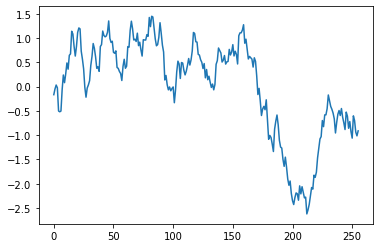

In [3]:
import pywt
import pywt.data
import numpy as np
import matplotlib.pyplot as plt

donnee = np.fromfile('synthetic_size50k_len256_znorm.bin', dtype=np.float32).reshape(-1, 256)
 
#print(time_series)
i = 1
t = range(256)
x = donnee[i,]
plt.plot(t,x)
cA, cD = pywt.dwt(donnee, 'db1')

#print(cA)

In [4]:
def compression_series(time_series_comp,size):
    if size==32:
        ndiv=3
    elif size==64:
        ndiv=2
    else:
        ndiv=1
    for i in range(ndiv):
        cA,Cd=pywt.dwt(time_series_comp, 'db1')
        time_series_comp=cA
    return time_series_comp
    
    

In [5]:
def reconstruction_series(time_series_recons,size):
    if size==32:
        ndiv=3
    elif size==64:
        ndiv=2
    else:
        ndiv=1
    for i in range(ndiv):
        cA=pywt.idwt(time_series_recons,None, 'db1')
        time_series_recons=cA
    return time_series_recons

In [6]:
def euclidienne(a,b):
    dist=float(np.linalg.norm(a-b))
    return dist

In [8]:
#Compression et Reconstruction synthetic_size50k et les erreurs de recontructions
data_synthetic=np.fromfile('synthetic_size50k_len256_znorm.bin', dtype=np.float32).reshape(-1, 256)
#Compress data 256 to 128 and Reconstruct data 
data_compress_128=compression_series(data_synthetic,128)
data_recons_128=reconstruction_series(data_compress_128,128)
#Compress data 256 to 64
data_compress_64=compression_series(data_synthetic,64)
data_recons_64=reconstruction_series(data_compress_64,64)
#Compress data 256 to 32
data_compress_32=compression_series(data_synthetic,32)
data_recons_32=reconstruction_series(data_compress_32,32)

#Error Reconstruction
erreur_128=0.0
erreur_64=0.0
erreur_32=0.0
for i in range(50000):
    erreur_128=erreur_128+euclidienne(data_synthetic[i],data_recons_128[i])
    erreur_64=erreur_64+euclidienne(data_synthetic[i],data_recons_64[i])
    erreur_32=erreur_32+euclidienne(data_synthetic[i],data_recons_32[i])

print("Reconstruction Error 128_synthetic",erreur_128)
print("Reconstruction Error 128_synthetic",erreur_64)
print("Reconstruction Error 128_synthetic",erreur_32)

erreur_moy_128=erreur_128/50000
erreur_moy_64=erreur_64/50000
erreur_moy_32=erreur_32/50000
print("Reconstruction Error 128_synthetic_moy",erreur_moy_128)
print("Reconstruction Error 128_synthetic_moy",erreur_moy_64)
print("Reconstruction Error 128_synthetic_moy",erreur_moy_32)

#print(len(data_synthetic[0]))
print(len(data_compress_128[0]))
print(len(data_compress_64[0]))
#print(len(data_compress_32[0]))
print(len(data_recons_128[0]))
print(len(data_recons_64[0]))


Reconstruction Error 128_synthetic 76273.23288753629
Reconstruction Error 128_synthetic 120327.73910528421
Reconstruction Error 128_synthetic 173555.6446928382
Reconstruction Error 128_synthetic_moy 1.5254646577507258
Reconstruction Error 128_synthetic_moy 2.406554782105684
Reconstruction Error 128_synthetic_moy 3.471112893856764
128
64
256
256


In [142]:
#Compression et Reconstruction seismic_size50k et les erreurs de recontructions
data_seismic=np.fromfile('seismic_size50k_len256_znorm.bin', dtype=np.float32).reshape(-1, 256)
#Compress data 256 to 128 and Reconstruct data 
data_compress_128=compression_series(data_seismic,128)
data_recons_128=reconstruction_series(data_compress_128,128)
#Compress data 256 to 64
data_compress_64=compression_series(data_seismic,64)
data_recons_64=reconstruction_series(data_compress_64,64)
#Compress data 256 to 32
data_compress_32=compression_series(data_seismic,32)
data_recons_32=reconstruction_series(data_compress_32,32)

#Error Reconstruction
erreur_128=0.0
erreur_64=0.0
erreur_32=0.0
for i in range(50000):
    erreur_128=erreur_128+euclidienne(data_seismic[i],data_recons_128[i])
    erreur_64=erreur_64+euclidienne(data_seismic[i],data_recons_64[i])
    erreur_32=erreur_32+euclidienne(data_seismic[i],data_recons_32[i])
    
print("Reconstruction Error 128_seismic",erreur_128)
print("Reconstruction Error 128_seismic",erreur_64)
print("Reconstruction Error 128_seismic",erreur_32)

erreur_moy_128=erreur_128/50000
erreur_moy_64=erreur_64/50000
erreur_moy_32=erreur_32/50000
print("Reconstruction Error 128_seismic_moy",erreur_moy_128)
print("Reconstruction Error 128_seismic_moy",erreur_moy_64)
print("Reconstruction Error 128_seismic_moy",erreur_moy_32)


Reconstruction Error 128_seismic 632932.1703531742
Reconstruction Error 128_seismic 771074.401494503
Reconstruction Error 128_seismic 790471.3970308304
Reconstruction Error 128_seismic_moy 12.658643407063485
Reconstruction Error 128_seismic_moy 15.42148802989006
Reconstruction Error 128_seismic_moy 15.809427940616608


In [ ]:
def summarizatio_euclidienne():